In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
df_can = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
df_can.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df_can.rename(columns={'value':'total'}, inplace=True)
df_can.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [28]:
df_criminal_filter = df_can[df_can['year']>2010]
df_criminal_filter.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5


In [29]:
df_criminal = df_criminal_filter.pivot_table('total',index='major_category',columns='year',aggfunc={'total':'sum'})
df_criminal.head()

year,2011,2012,2013,2014,2015,2016
major_category,,,,,,
Burglary,93315,93392,87222,76053,70489,68285
Criminal Damage,70914,62158,56206,59279,62976,64071
Drugs,57550,51776,50278,44435,39785,38914
Fraud or Forgery,0,0,0,0,0,0
Other Notifiable Offences,10264,10675,10811,13037,14229,15809


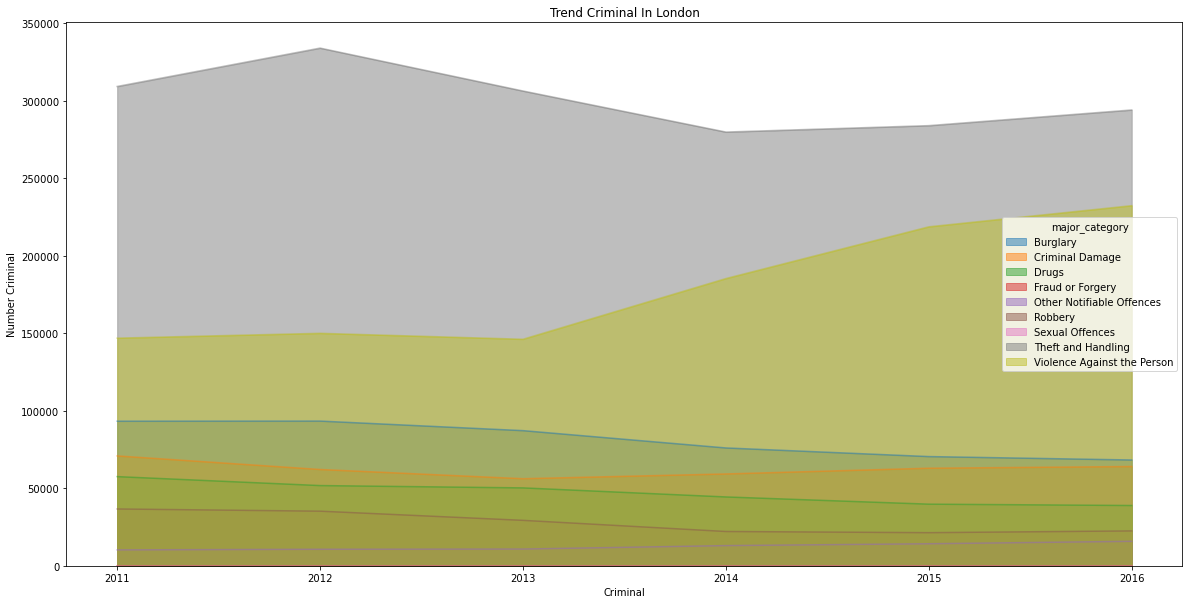

In [73]:
df_criminal_trns = df_criminal.transpose()
df_criminal_trns.plot(kind='area', stacked = False, figsize=(20,10))
plt.title('Trend Criminal In London')
plt.ylabel('Number Criminal')
plt.xlabel('Criminal')
plt.show()

In [16]:
df_criminal_filter_2 = df_can[df_can['year']>2015]
df_criminal_filter_2.head()

,lsoa_code,borough,major_category,minor_category,total,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2


In [62]:
df_criminal_2 = df_criminal_filter.pivot_table('total',index='major_category',columns='borough',aggfunc={'total':'sum'})
df_criminal_2.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
major_category,,,,,,,,,,,,,,,,,,,,,
Burglary,11768.0,24841.0,8711.0,18666.0,17109.0,17836.0,15.0,21210.0,19375.0,19190.0,...,10714.0,15869.0,16976.0,10562.0,18763.0,8481.0,15494.0,15566.0,16889.0,20694.0
Criminal Damage,10843.0,12763.0,9434.0,13000.0,13634.0,11022.0,16.0,18481.0,15342.0,12996.0,...,8312.0,14031.0,10376.0,7030.0,15343.0,8024.0,13572.0,11811.0,11472.0,12857.0
Drugs,5628.0,5958.0,4636.0,17606.0,5688.0,12116.0,33.0,11553.0,10643.0,7857.0,...,3983.0,10726.0,9804.0,2859.0,15055.0,3004.0,15019.0,8051.0,5595.0,21430.0
Fraud or Forgery,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Notifiable Offences,1925.0,2115.0,1508.0,2721.0,1871.0,2611.0,17.0,3113.0,3082.0,2373.0,...,1040.0,3224.0,2019.0,1047.0,2825.0,973.0,3105.0,2124.0,2179.0,4289.0


Text(0.5, 0, 'Borough')

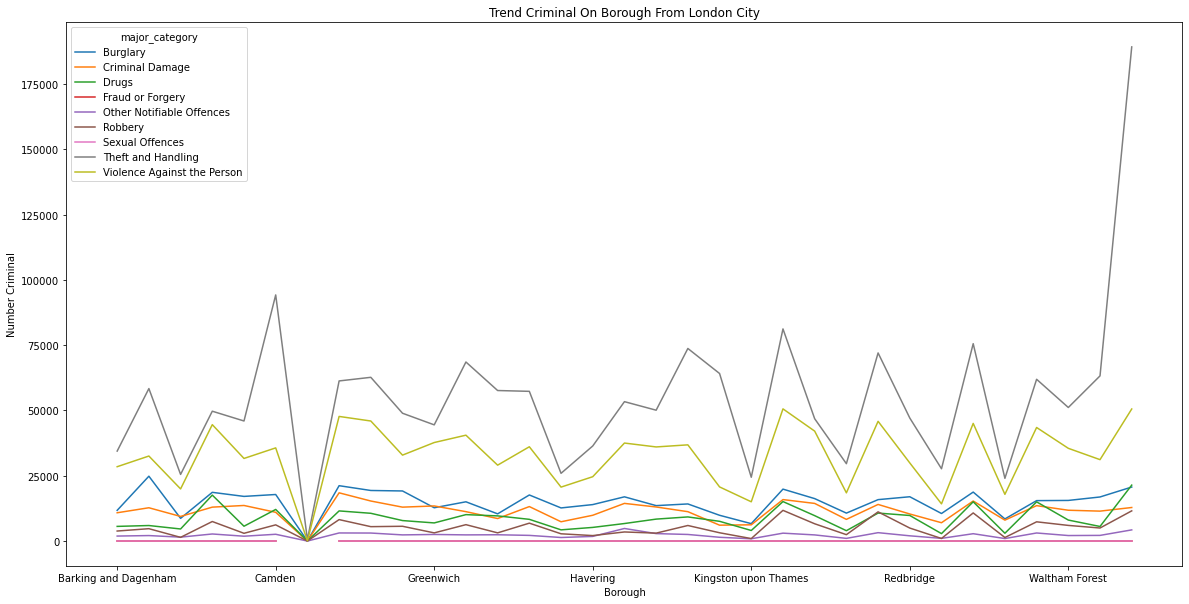

In [76]:
df_criminal_2_CB = df_criminal_2.transpose()
df_criminal_2_CB.plot (kind='line', figsize=(20,10))
plt.title('Trend Criminal On Borough From London City')
plt.ylabel('Number Criminal')
plt.xlabel('Borough')

In [ ]:
df_can